<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTERPOLACIÓN DE LAGRANGE**

¿Con  qué  grado  de  exactitud  podemos  calcular √114  mediante  la  interpolación  de Lagrange para la función f(x) =√x, si elegimos los puntosx0= 100, x1= 121, x2= 144?


|E|≃1.8×10−3.


**TEORÍA**
![Tarea_2-Interpolación[1]_page-0001.jpg](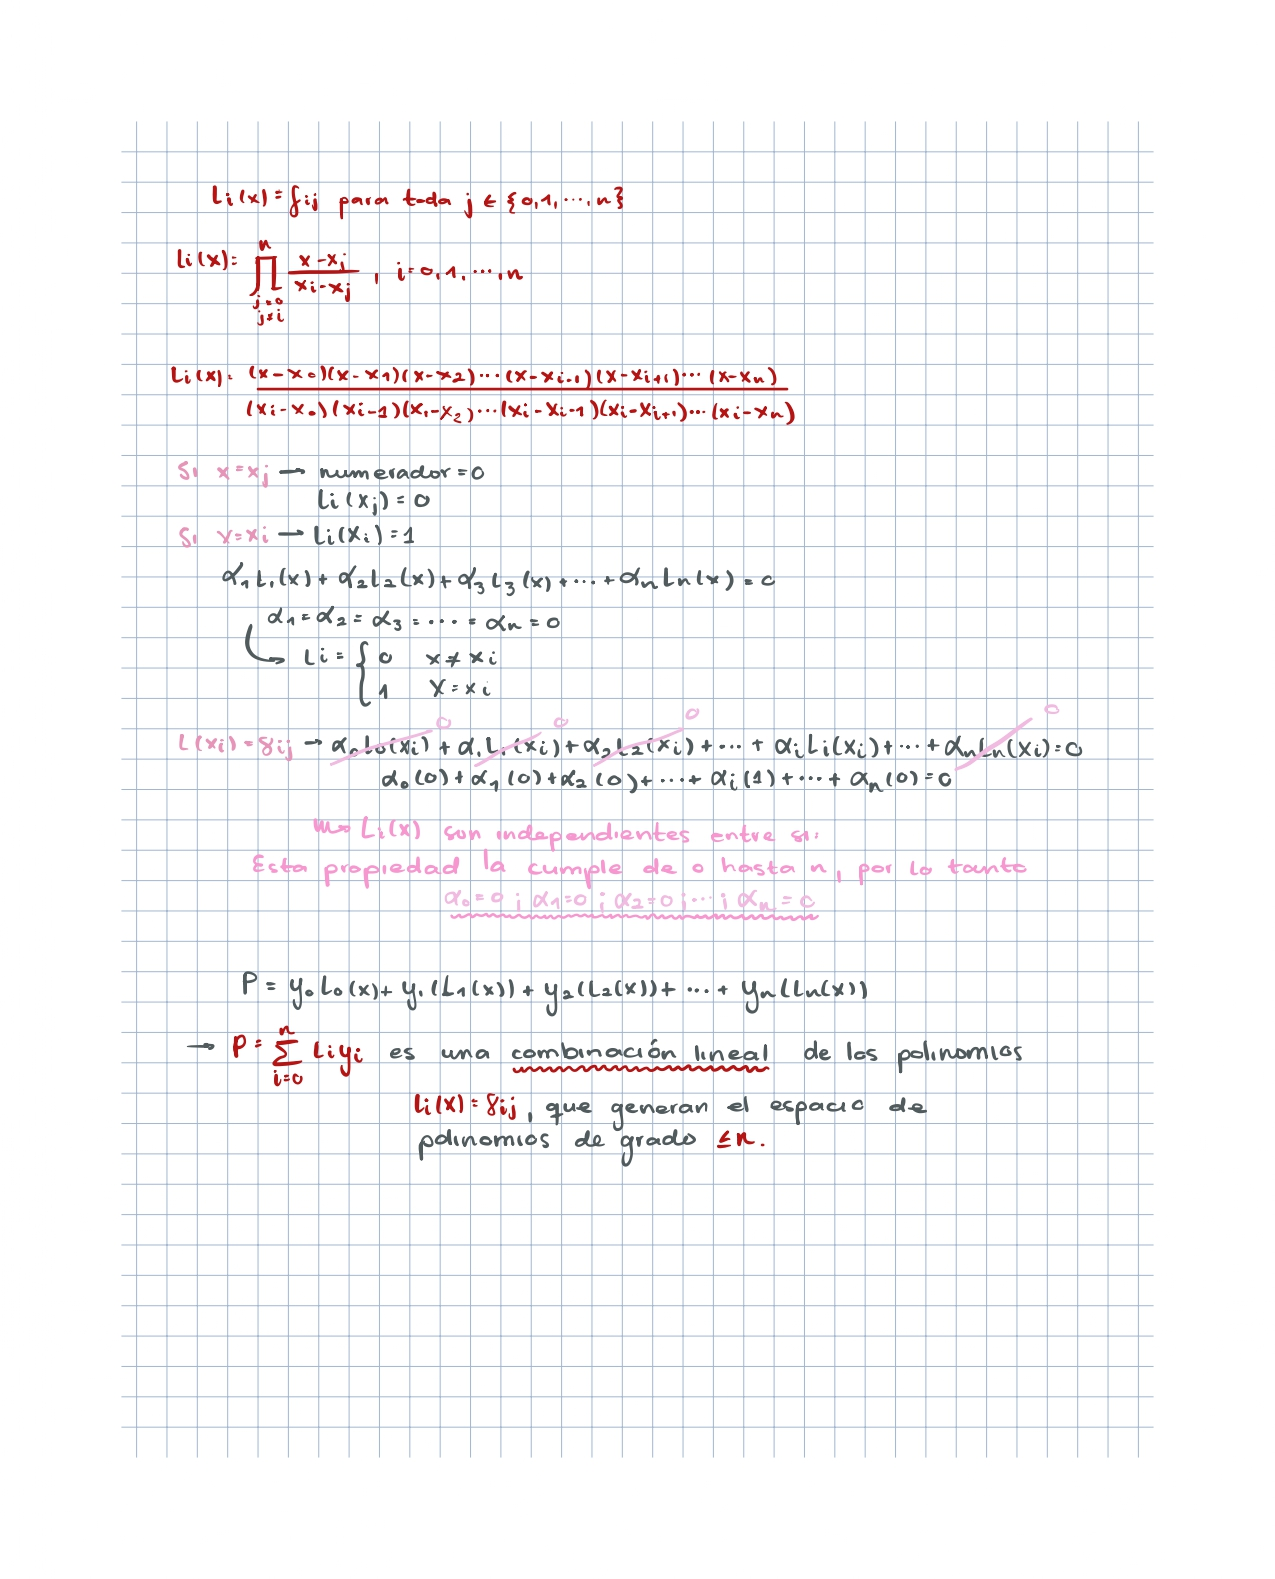)

In [ ]:
import numpy as np
import sympy as sym
xi = np.array([100,121,144])
fi = np.sqrt(xi)
x = sym.Symbol('x',real=True)

In [ ]:
#Calcula la base cardinal de Lagrange
def PolinomioLagrange(x,xi,i):
  L = 1
  for j in range(len(xi)):
    if i != j:
      L *= (x-xi[j])/(xi[i]-xi[j])
  return L



In [ ]:
# Calcula el polinomio
def Interpolacion(x,xi,fi):
  sumatoria = 0
  for i in range(len(xi)):
    sumatoria += fi[i]*PolinomioLagrange(x,xi,i)
  return sumatoria

In [ ]:
inter = Interpolacion(x,xi,fi)
print(inter)


10.0*(36/11 - x/44)*(121/21 - x/21) + 11.0*(144/23 - x/23)*(x/21 - 100/21) + 12.0*(x/44 - 25/11)*(x/23 - 121/23)


In [ ]:
xobj = 114
error = np.abs(inter.subs(x,xobj) - np.sqrt(xobj))
print("El valor calculado es: ", inter.subs(x,xobj), "y el valor real es: ", np.sqrt(xobj))
print("El error entre el valor real y el calculado es de ", error)


El valor calculado es:  10.6758893280632 y el valor real es:  10.677078252031311
El error entre el valor real y el calculado es de  0.00118892396807091


 En el lanzamiento de una bala, una cámara fotográfica registra las siguientes posicionesen metros respecto al arma homicida (tome g=−9.8m/s^2 j):

https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv

Estime el vector velocidad inicial, que estaría definido por la magnitud y dirección.  Rpta:V0= 10m/s y θ= 20◦. Hint:Encuentre el termino lineal y cuadrático de la interpolación y compare con la ecuación de trayectoria de la bala.

In [ ]:
import pandas as pd
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'
datos = pd.read_csv(url)
print(datos.head())


     X         Y
0  1.4  0.400795
1  3.5  0.594128
2  5.6  0.298028


0    1.4
1    3.5
2    5.6
Name: X, dtype: float64
0    0.400795
1    0.594128
2    0.298028
Name: Y, dtype: float64


Text(0, 0.5, 'y')

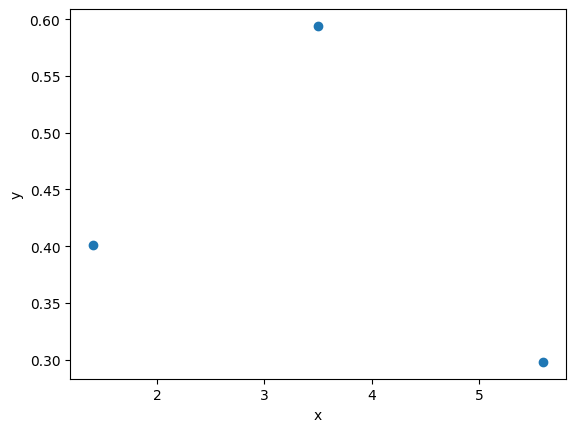

In [ ]:
ejx = datos.X
ejy = datos.Y
print(ejx)
print(ejy)
plt.scatter(ejx,ejy,label='puntos originales')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
y = sym.Symbol('y',real=True)
x = sym.Symbol('x',real=True)

"Calcula el polinomio"
poli = Interpolacion(x,ejx,ejy)
polinomio = sym.expand(poli)
print(polinomio)

-0.0554912422401579*x**2 + 0.363970234266202*x + 2.77555756156289e-17


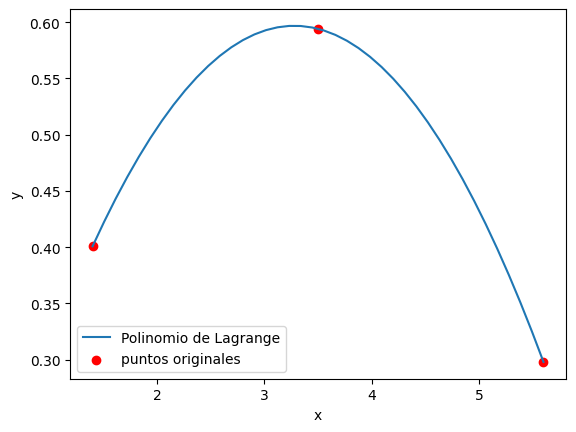

In [ ]:
#Grafica el polinomio
funcion = sym.lambdify(x, polinomio, 'numpy')
xi= np.linspace(min(ejx), max(ejx), 40)
yi = funcion(xi)

plt.plot(xi, yi, label='Polinomio de Lagrange')
plt.scatter(ejx, ejy, color='red', label='puntos originales')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
#Ajuste de cuadrático
coeficientes = np.polyfit(xi,yi,2)
print(coeficientes)
a,b,c = coeficientes
print(a,b,c)

[-5.54912422e-02  3.63970234e-01  1.54476673e-15]
-0.05549124224015773 0.3639702342662011 1.5447667261737484e-15


Ecuación de la trayectoria de movimiento parabólico:

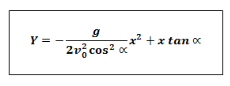

In [ ]:
# y = ax^2 + bx
g = 9.8
tantheta = b

# a = -g / (2 * V0^2 * cos^2(theta))
fraccion = -g / (2 * a)
theta = np.arctan(tantheta)
theta_grados = theta *180/np.pi

V0 = np.sqrt(fraccion) / np.cos(theta)
print("La velocidad inicial es de: ", np.round(V0,1), "m/s")
print("El ángulo es de: " , np.round(theta_grados,1), "°")

La velocidad inicial es de:  10.0 m/s
El ángulo es de:  20.0 °


# **PROBLEMA 8**
Derivada progresiva, derivada central y derivada analítica

**TEORÍA**

a) Calcular analíticamente el polinomio que interpola el conjunto soporte.

b) Derivar el polinomio interpolador para encontrar la derivada en el punto x0:


![Note_3-09-2024_(2)[1]_page-0001.jpg](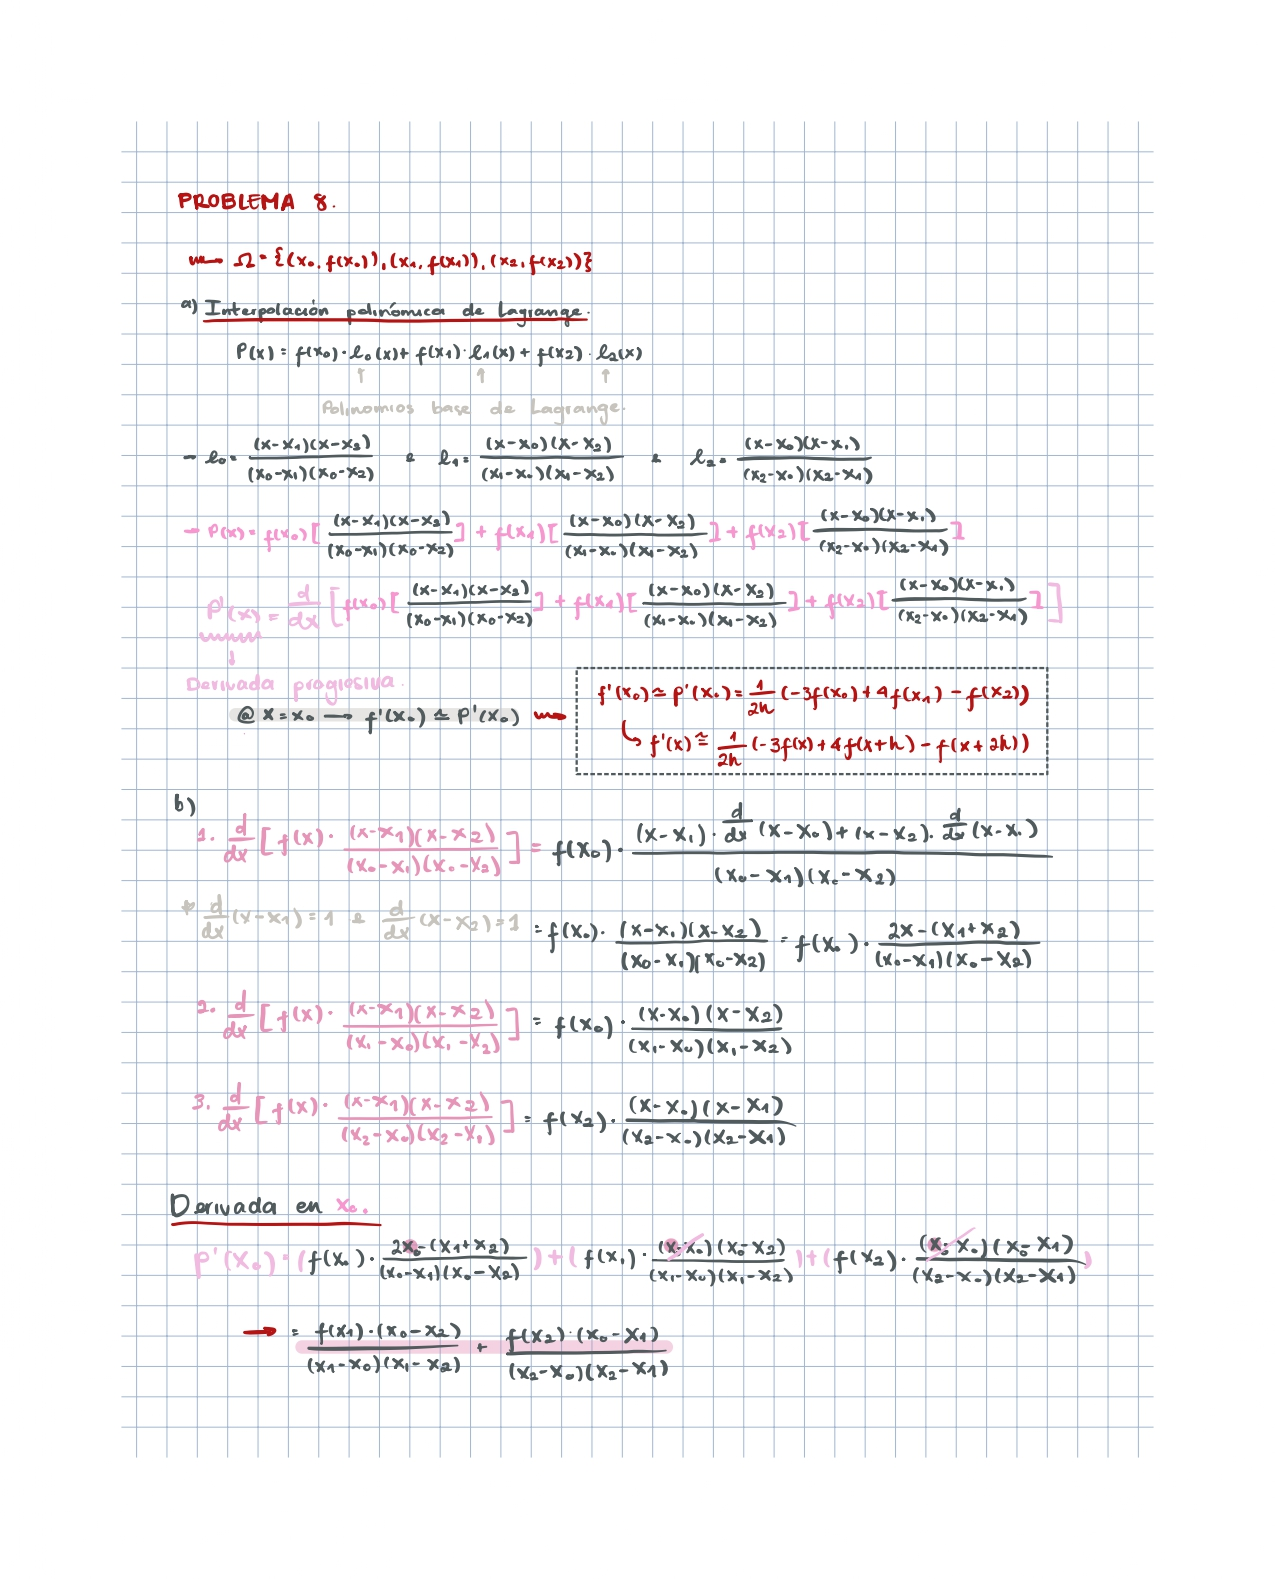)

**EJERCICIOS EN PYTHON**

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


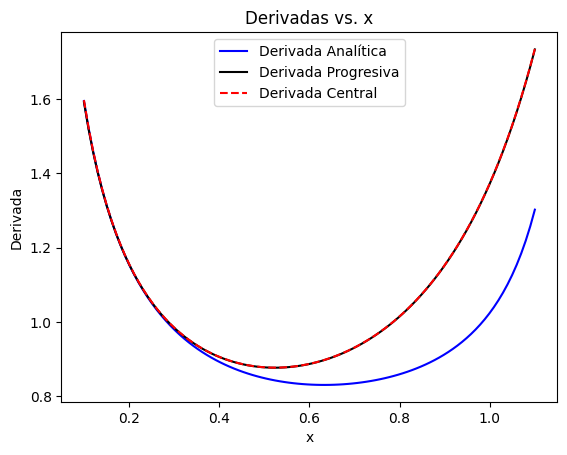

In [1]:
import numpy as np
import matplotlib.pyplot as plt

intervalo_x = np.linspace(0.1,1.1,100)
h= 0.01

def f(x:float)->float:
  return np.sqrt(np.tan(x), dtype=complex)

def derivada_analitica(x:float)->float:
  return ((1/(2*np.sqrt(np.tan(x))))*(1+(np.tan(x**2))))

def derivada_progresiva (x:float,h=float)->float:
  return ((1/(2*h))*((-3*f(x))+(4*f(x+h))-(f(x+(2*h)))))

def central_difference(x:float, h:float)->float:
  return (f(x + h) - f(x - h)) / (2 * h)


#Gráfica conjunta de de la función f(x) con la estimación central y progresiva de orden O(h^2).

central_derivative_values = central_difference(intervalo_x, h)
analytic_derivative_values = derivada_analitica(intervalo_x)
progresiva_derivative_values = derivada_progresiva(intervalo_x,h)


plt.plot(intervalo_x, analytic_derivative_values, label='Derivada Analítica',color='blue')
plt.plot(intervalo_x, progresiva_derivative_values, label='Derivada Progresiva',color='black')
plt.plot(intervalo_x, central_derivative_values, label='Derivada Central', linestyle='--',color='red')
plt.title('Derivadas vs. x')
plt.xlabel('x')
plt.ylabel('Derivada')
plt.legend()
plt.show()


**Error nodal**

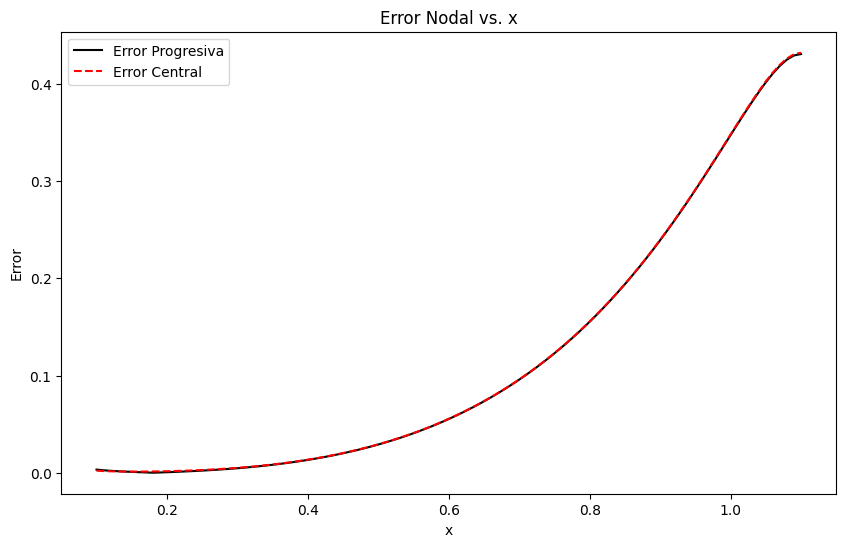

In [3]:
#Cálculo del error nodal para la derivada central y la derivada progresiva

error_central = np.abs(central_derivative_values - analytic_derivative_values)
error_progresiva = np.abs(progresiva_derivative_values - analytic_derivative_values)

plt.figure(figsize=(10, 6))
plt.plot(intervalo_x, error_progresiva, label='Error Progresiva', color='black')
plt.plot(intervalo_x, error_central, label='Error Central', linestyle='--', color='red')
plt.title('Error Nodal vs. x')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.show()

# ¿Tienen efectivamente el mismo orden de precisión ambos resultados?

La diferencia central normalmente tiene un término de error proporcional a h^2, por lo tanto cuando h disminuye el error diminuye cuadráticamente, haciéndolo más preciso para valores pequeños de h.

En el caso de la derivada progresiva, el error es proporcional a h, así que el error disminuye linealmente con el valor de h. Por lo tanto, haría a este tipo de cálculo de la derivada menos preciso para la misma h.
Todo esto es porque la derivada central usa las aproximaciones hacia adelante y hacia atrás, resultando en un término de error de orden más alto.
